In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from skimage.transform import resize
from pathlib import Path
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [30]:
cols = ['Age', 'Sex', 'PositivityAtAdmission', 'Temp_C', 'DaysFever', 'Cough',
       'DifficultyInBreathing', 'WBC', 'RBC', 'CRP', 'Fibrinogen', 'Glucose',
       'PCT', 'LDH', 'INR', 'D_dimer', 'Ox_percentage', 'PaO2', 'SaO2',
       'PaCO2', 'pH', 'CardiovascularDisease', 'IschemicHeartDisease',
       'AtrialFibrillation', 'HeartFailure', 'Ictus', 'HighBloodPressure',
       'Diabetes', 'Dementia', 'BPCO', 'Cancer', 'ChronicKidneyDisease',
       'RespiratoryFailure', 'Obesity', 'Position']

In [31]:
test_attentions = np.load(
    "../data/raw_output/checkpoints_xplainable/ES_2022-10-03_15:27:54.457214/attentions/attentions.npy")
valid_attentions = np.load(
    "../data/raw_output/checkpoints_xplainable/ES_2022-10-03_15:27:54.457214/attentions/valid_attentions.npy")

test_predictions = np.load(
    "../data/raw_output/checkpoints_xplainable/ES_2022-10-03_15:27:54.457214/attentions/predictions.npy")
valid_predictions = np.load(
    "../data/raw_output/checkpoints_xplainable/ES_2022-10-03_15:27:54.457214/attentions/valid_predictions.npy")

print(test_attentions.shape, valid_attentions.shape)

def reshape(inp):
    return np.moveaxis(inp.reshape(-1, 16, 16, 35), 3, 1)

test_attentions = reshape(test_attentions)
valid_attentions = reshape(valid_attentions)

print(test_attentions.shape, valid_attentions.shape)

(486, 256, 35, 1) (221, 256, 35, 1)
(486, 35, 16, 16) (221, 35, 16, 16)


In [32]:
test = pd.read_csv('../data/raw_output/checkpoints_xplainable/ES_2022-10-03_14:38:32.747001/pred_xplain.csv')
valid = pd.read_csv(
    '../data/raw_output/checkpoints_xplainable/ES_2022-10-03_14:38:32.747001/pred_xplain_valid.csv')

train_original = pd.read_excel('../data/raw_data/trainClinData.xls')
test_original = pd.read_excel('../data/raw_data/testClinData.xls')

In [33]:
test.head()

,file,prognosis,prognosis_real
0,P_3_29.png,SEVERE,MILD
1,P_3_415.png,MILD,MILD
2,P_3_163.png,SEVERE,MILD
3,P_3_348.png,MILD,SEVERE
4,P_3_263.png,SEVERE,SEVERE


In [34]:
valid.head()

,file,prognosis,prognosis_real
0,P_2_8.png,MILD,MILD
1,P_156.png,MILD,SEVERE
2,P_265.png,MILD,MILD
3,P_2_120.png,SEVERE,SEVERE
4,P_2_3.png,SEVERE,MILD


In [35]:
test_original.head()

,Row_number,ImageFile,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death
0,1247.0,P_3_29.png,F,76,1,1,36.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1199.0,P_3_415.png,F,64,0,1,36.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1504.0,P_3_163.png,F,87,1,1,37.6,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,1271.0,P_3_348.png,F,76,1,1,36.0,NaN,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1572.0,P_3_263.png,F,77,1,1,36.1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [36]:
test_original[['Sex', 'PositivityAtAdmission', 'Cough',
       'DifficultyInBreathing', 'HighBloodPressure',
       'Diabetes', 'Dementia', 'BPCO', 'Cancer', 'ChronicKidneyDisease',
       'RespiratoryFailure', 'Obesity']]

,Sex,PositivityAtAdmission,Cough,DifficultyInBreathing,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity
0,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
481,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
482,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
483,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
train_original.head()

,Row_number,ImageFile,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death
0,82,P_102.png,A,72.000000,1,1.0,37.3,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,SEVERE,0
1,228,P_131.png,D,35.913889,0,1.0,39.3,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,MILD,0
2,229,P_132.png,D,57.266667,0,1.0,37.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,MILD,0
3,96,P_117.png,A,39.000000,1,1.0,37.2,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MILD,0
4,112,P_16.png,A,44.000000,0,1.0,38.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SEVERE,0


In [60]:
from collections import Counter
for feature in ['Sex', 'Cough',
                'DifficultyInBreathing', 'HighBloodPressure',
                'Diabetes', 'Dementia', 'BPCO',
                'Cancer', 'ChronicKidneyDisease',
                'RespiratoryFailure', 'Obesity']:
    print(f"{feature:21}", Counter(test_original[feature].dropna()))

Sex                   Counter({0: 278, 1: 208})
Cough                 Counter({0.0: 350, 1.0: 134})
DifficultyInBreathing Counter({1.0: 270, 0.0: 214})
HighBloodPressure     Counter({1.0: 245, 0.0: 235})
Diabetes              Counter({0.0: 409, 1.0: 71})
Dementia              Counter({0.0: 457, 1.0: 23})
BPCO                  Counter({0.0: 451, 1.0: 29})
Cancer                Counter({0.0: 451, 1.0: 29})
ChronicKidneyDisease  Counter({0.0: 459, 1.0: 21})
RespiratoryFailure    Counter({0.0: 471, 1.0: 9})
Obesity               Counter({0.0: 450, 1.0: 30})


In [61]:
def plot_test_mild_severe_difference(original, predictions, attentions, features, cols=cols, test=test):
    fig, axes = plt.subplots(2, len(features), figsize=(20, 8))
    for ind in range(len(features)):
        selected_index = original[original[features[ind]] == 1.0].index.values
        selected_preds = predictions[selected_index].flatten()
        selected_attentions = attentions[selected_index]

        prognosis = test['prognosis_real']
        prognosis_pred = test['prognosis']

        balanced_acc = balanced_accuracy_score(prognosis, prognosis_pred)
        acc = accuracy_score(prognosis, prognosis_pred)

        severe = selected_attentions[np.where(selected_preds == 1)]
        mild = selected_attentions[np.where(selected_preds == 0)]

        selected_prognosis = prognosis[selected_index]
        selectes_prognosis_pred = prognosis_pred[selected_index]

        s_balanced_acc = balanced_accuracy_score(selected_prognosis, selectes_prognosis_pred)
        s_acc = accuracy_score(selected_prognosis, selectes_prognosis_pred)

        data = axes[0, ind].imshow(np.mean(mild, axis=0)[cols.index(features[ind])],
                                   interpolation=None, vmin=0, vmax=0.015)
        divider = make_axes_locatable(axes[0, ind])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(data, cax=cax)
        axes[0, ind].set_title(
            f'{features[ind]}\nMILD\nBA : {balanced_acc:.3f}\nS BA : {s_balanced_acc:.3f}')
        data = axes[1, ind].imshow(np.mean(severe, axis=0)[cols.index(features[ind])],
                                   interpolation=None, vmin=0, vmax=0.015)
        divider = make_axes_locatable(axes[1, ind])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(data, cax=cax)
        axes[1, ind].set_title(
            f'{features[ind]}\nSEVERE\nACC : {acc:.3f}\nS ACC : {s_acc:.3f}')
        axes[0, ind].set_xticks([])
        axes[0, ind].set_yticks([])
        axes[1, ind].set_xticks([])
        axes[1, ind].set_yticks([])
    fig.tight_layout()
    plt.show()
    
def plot_test_mild_severe_difference_complementer(original, predictions, attentions, features, cols=cols, test=test):
    fig, axes = plt.subplots(2, len(features), figsize=(20, 8))
    for ind in range(len(features)):
        selected_index = original[original[features[ind]] == 0.0].index.values
        selected_preds = predictions[selected_index].flatten()
        selected_attentions = attentions[selected_index]

        prognosis = test['prognosis_real']
        prognosis_pred = test['prognosis']

        balanced_acc = balanced_accuracy_score(prognosis, prognosis_pred)
        acc = accuracy_score(prognosis, prognosis_pred)

        severe = selected_attentions[np.where(selected_preds == 1)]
        mild = selected_attentions[np.where(selected_preds == 0)]

        selected_prognosis = prognosis[selected_index]
        selectes_prognosis_pred = prognosis_pred[selected_index]

        s_balanced_acc = balanced_accuracy_score(selected_prognosis, selectes_prognosis_pred)
        s_acc = accuracy_score(selected_prognosis, selectes_prognosis_pred)

        data = axes[0, ind].imshow(np.mean(mild, axis=0)[cols.index(features[ind])],
                                   interpolation=None, vmin=0, vmax=0.015)
        divider = make_axes_locatable(axes[0, ind])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(data, cax=cax)
        axes[0, ind].set_title(
            f'{features[ind]}\nMILD\nBA : {balanced_acc:.3f}\nS BA : {s_balanced_acc:.3f}')
        data = axes[1, ind].imshow(np.mean(severe, axis=0)[cols.index(features[ind])],
                                   interpolation=None, vmin=0, vmax=0.015)
        divider = make_axes_locatable(axes[1, ind])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(data, cax=cax)
        axes[1, ind].set_title(
            f'{features[ind]}\nSEVERE\nACC : {acc:.3f}\nS ACC : {s_acc:.3f}')
        axes[0, ind].set_xticks([])
        axes[0, ind].set_yticks([])
        axes[1, ind].set_xticks([])
        axes[1, ind].set_yticks([])
    fig.tight_layout()
    plt.show()

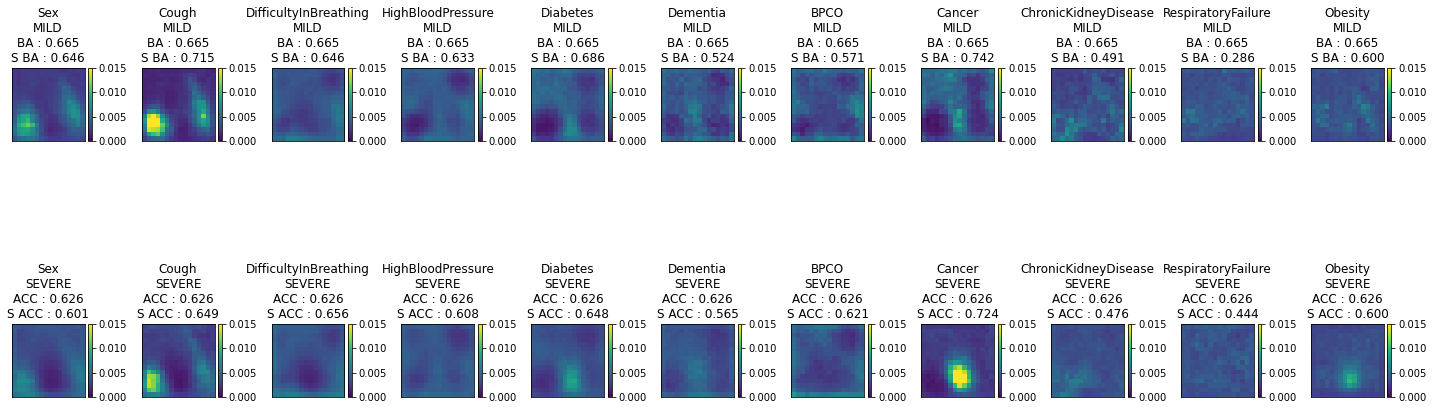

In [62]:
plot_test_mild_severe_difference(test_original, test_predictions, test_attentions,
                   ['Sex', 'Cough',
                   'DifficultyInBreathing', 'HighBloodPressure',
                   'Diabetes', 'Dementia', 'BPCO', 'Cancer', 'ChronicKidneyDisease',
                   'RespiratoryFailure', 'Obesity'])

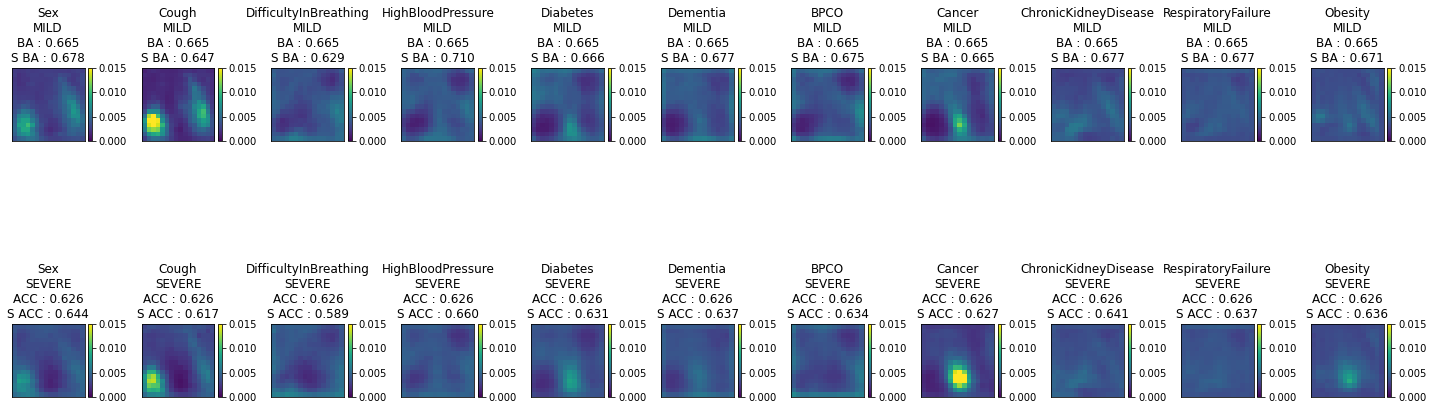

In [63]:
plot_test_mild_severe_difference_complementer(test_original, test_predictions, test_attentions,
                     ['Sex', 'Cough',
                   'DifficultyInBreathing', 'HighBloodPressure',
                   'Diabetes', 'Dementia', 'BPCO', 'Cancer', 'ChronicKidneyDisease',
                   'RespiratoryFailure', 'Obesity'])

In [85]:
def plot_valid_mild_severe_difference(original, predictions, attentions, features, cols=cols, valid=valid):
    fig, axes = plt.subplots(2, len(features), figsize=(20, 8))
    for ind in range(len(features)):
        selected_index = original[original[features[ind]] == 1.0].index.values
        matching_index = []
        for _ind_ in selected_index:
            file_name = original.iloc[_ind_]['ImageFile']
            if file_name in valid['file'].values:
                matching_index.append(valid['file'].values.tolist().index(file_name))
        selected_index = np.array(matching_index)
        selected_preds = predictions[selected_index].flatten()
        selected_attentions = attentions[selected_index]

        prognosis = valid['prognosis_real']
        prognosis_pred = valid['prognosis']

        balanced_acc = balanced_accuracy_score(prognosis, prognosis_pred)
        acc = accuracy_score(prognosis, prognosis_pred)

        severe = selected_attentions[np.where(selected_preds == 1)]
        mild = selected_attentions[np.where(selected_preds == 0)]

        selected_prognosis = prognosis[selected_index]
        selected_prognosis_pred = prognosis_pred[selected_index]

        s_balanced_acc = balanced_accuracy_score(selected_prognosis, selected_prognosis_pred)
        s_acc = accuracy_score(selected_prognosis, selected_prognosis_pred)

        data = axes[0, ind].imshow(np.mean(mild, axis=0)[cols.index(features[ind])],
                                   interpolation=None, vmin=0.005, vmax=0.015)
        divider = make_axes_locatable(axes[0, ind])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(data, cax=cax)
        axes[0, ind].set_title(
            f'{features[ind]}\nMILD\nBA : {balanced_acc:.3f}\nS BA : {s_balanced_acc:.3f}')
        data = axes[1, ind].imshow(np.mean(severe, axis=0)[cols.index(features[ind])],
                                   interpolation=None, vmin=0.005, vmax=0.015)
        divider = make_axes_locatable(axes[1, ind])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(data, cax=cax)
        axes[1, ind].set_title(
            f'{features[ind]}\nSEVERE\nACC : {acc:.3f}\nS ACC : {s_acc:.3f}')
        axes[0, ind].set_xticks([])
        axes[0, ind].set_yticks([])
        axes[1, ind].set_xticks([])
        axes[1, ind].set_yticks([])
    fig.tight_layout()
    plt.show()
    
def plot_valid_mild_severe_difference_complementer(original, predictions, attentions, features, cols=cols, valid=valid):
    fig, axes = plt.subplots(2, len(features), figsize=(20, 8))
    for ind in range(len(features)):
        selected_index = original[original[features[ind]] == 0.0].index.values
        matching_index = []
        for _ind_ in selected_index:
            file_name = original.iloc[_ind_]['ImageFile']
            if file_name in valid['file'].values:
                matching_index.append(valid['file'].values.tolist().index(file_name))
        selected_index = np.array(matching_index)
        selected_preds = predictions[selected_index].flatten()
        selected_attentions = attentions[selected_index]

        prognosis = valid['prognosis_real']
        prognosis_pred = valid['prognosis']

        balanced_acc = balanced_accuracy_score(prognosis, prognosis_pred)
        acc = accuracy_score(prognosis, prognosis_pred)

        severe = selected_attentions[np.where(selected_preds == 1)]
        mild = selected_attentions[np.where(selected_preds == 0)]

        selected_prognosis = prognosis[selected_index]
        selected_prognosis_pred = prognosis_pred[selected_index]

        s_balanced_acc = balanced_accuracy_score(selected_prognosis, selected_prognosis_pred)
        s_acc = accuracy_score(selected_prognosis, selected_prognosis_pred)

        data = axes[0, ind].imshow(np.mean(mild, axis=0)[cols.index(features[ind])],
                                   interpolation=None, vmin=0.005, vmax=0.015)
        divider = make_axes_locatable(axes[0, ind])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(data, cax=cax)
        axes[0, ind].set_title(
            f'{features[ind]}\nMILD\nBA : {balanced_acc:.3f}\nS BA : {s_balanced_acc:.3f}')
        data = axes[1, ind].imshow(np.mean(severe, axis=0)[cols.index(features[ind])],
                                   interpolation=None, vmin=0.005, vmax=0.015)
        divider = make_axes_locatable(axes[1, ind])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(data, cax=cax)
        axes[1, ind].set_title(
            f'{features[ind]}\nSEVERE\nACC : {acc:.3f}\nS ACC : {s_acc:.3f}')
        axes[0, ind].set_xticks([])
        axes[0, ind].set_yticks([])
        axes[1, ind].set_xticks([])
        axes[1, ind].set_yticks([])
    fig.tight_layout()
    plt.show()

/opt/miniconda/envs/ai4covid/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


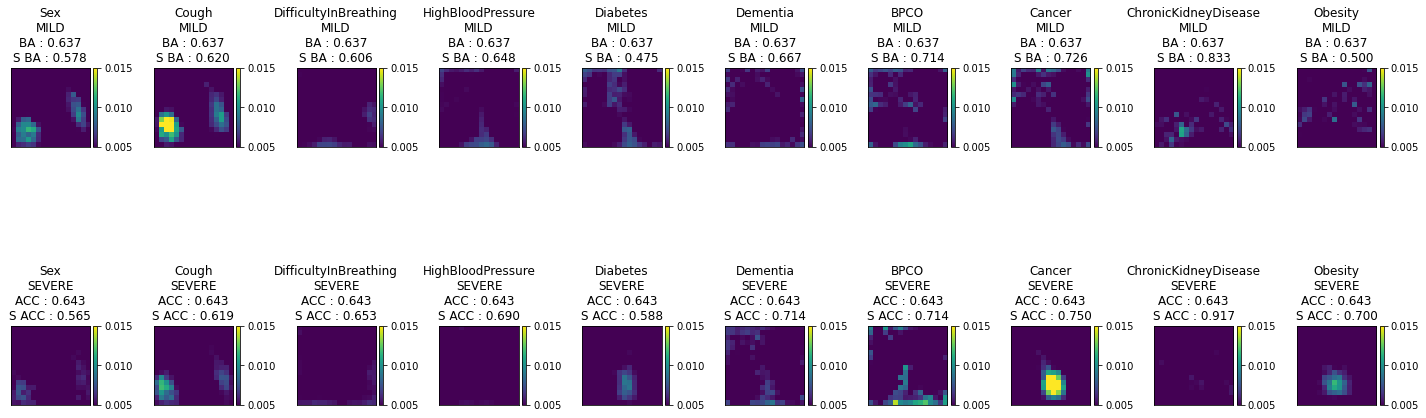

In [86]:
plot_valid_mild_severe_difference(train_original, valid_predictions, valid_attentions,
                                 ['Sex', 'Cough',
                   'DifficultyInBreathing', 'HighBloodPressure',
                   'Diabetes', 'Dementia', 'BPCO', 'Cancer', 'ChronicKidneyDisease',
                   'Obesity'])

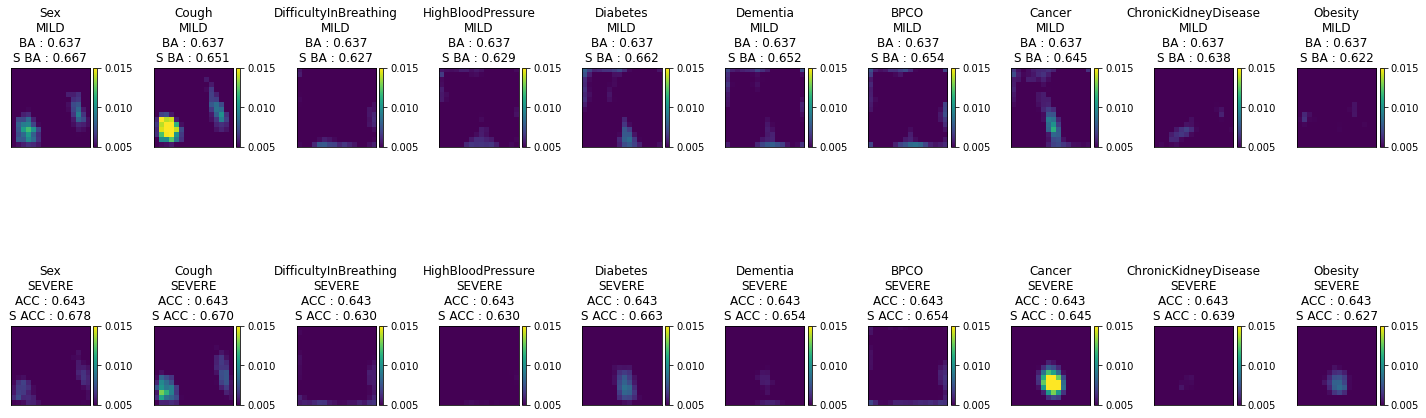

In [87]:
plot_valid_mild_severe_difference_complementer(train_original, valid_predictions, valid_attentions,
                                 ['Sex', 'Cough',
                   'DifficultyInBreathing', 'HighBloodPressure',
                   'Diabetes', 'Dementia', 'BPCO', 'Cancer', 'ChronicKidneyDisease',
                   'Obesity'])